# 2018/2019 - Task List 1

1. Generate random variable from prefered dystribution using Pyro (pyro.sample)
    
    - animate how distribution of values changes
    - animate histograms of values
    - start with empty list of values, generate new samples, generate histogram
    
    
2. Write a simulator (and exact solution utilizing Bayes theorem) for chances to be ill on a certain disease. We know that it affects from about 1 to 100 out of 50,000 people. There was developed a test to check whether the person has the disease and it is quite accurate: the probability that the test result is positive (suggesting the person has the disease), given that the person does not have the disease, is only 2 percent; the probability that the test result is negative (suggesting the person does not have the disease), given that the person has the disease, is only 1 percent. When a random person gets tested for the disease and the result comes back positive, what is the probability that the person has the disease? Check whole parameter space and visualise results.

    - it must be a simulator!
    - sample from distribution using given probabilities
    - repeate experiment and compare with Bayes equation


## Required imports

In [3]:
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

## Generating single value from normal distribution with given mean and variance

In [236]:
mean = 0
variance = 10
x = pyro.sample("normal_sampling", pyro.distributions.Normal(mean, variance))
print(x)

tensor(1.5970)


## Sampling from categorical probabilities with given probabilities

In [249]:
x = pyro.sample("categorical_sampling", pyro.distributions.Categorical(logits = torch.tensor([0.5, 0.5])))
print(x)

tensor(2.4776)


## Animating data

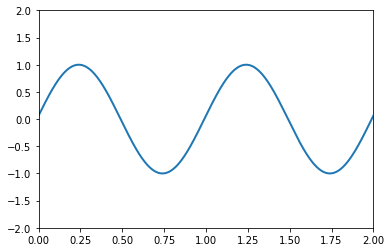

In [253]:
def animate():
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots()

    ax.set_xlim(( 0, 2))
    ax.set_ylim((-2, 2))

    line, = ax.plot([], [], lw=2)
    
    # animation function. This is called sequentially
    def sin(i):
        x = np.linspace(0, 2, 1000)
        y = np.sin(2 * np.pi * (x - 0.01 * i))
        line.set_data(x, y)
        return (line,)

    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, sin, init_func=init,
                                   frames=100, interval=20, blit=True)
    return HTML(anim.to_jshtml())

animate()

## Drawing histogram

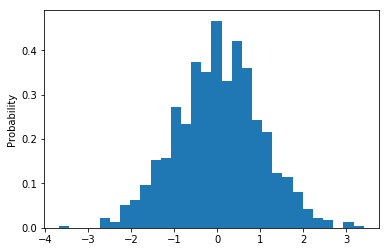

In [12]:
x = np.random.normal(size = 1000)
plt.hist(x, density=True, bins=30)
plt.ylabel('Probability');

## Task 1

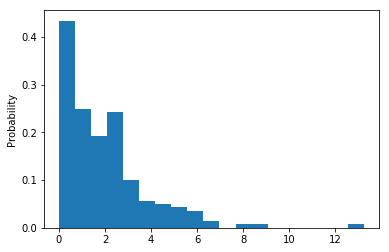

In [2]:
## Insert solution here

%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

def sample():
    return pyro.sample("exponential_sampling", pyro.distributions.Exponential(0.5))

def drawHist(_):
    plt.cla()
    values.append(sample())
    plt.hist(values, density=True, bins='auto')
    plt.ylabel('Probability')

values = []
fig = plt.figure()

anim = animation.FuncAnimation(fig, drawHist, frames=200, interval=40)
HTML(anim.to_jshtml())

## Task 2

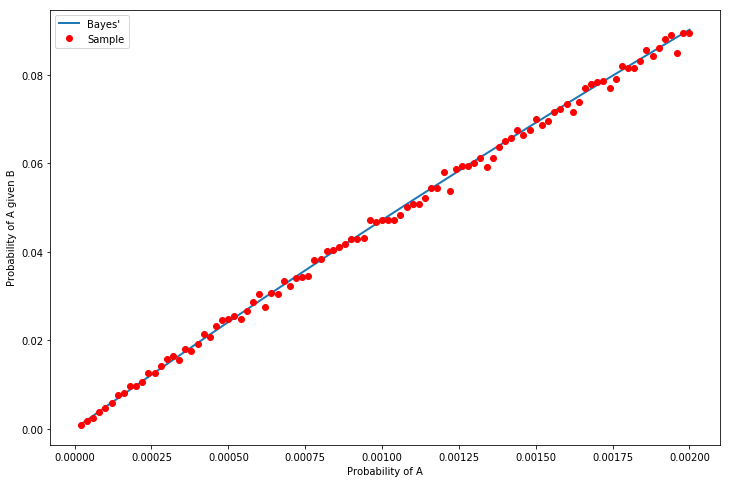

In [86]:
## Insert solution here
%matplotlib inline
import pyro
import torch
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# A - object is ill
# B - test result is positive
# pA - probability of event A
# pA_B - probability of event A given B
# pNA - probability of event opposite to A

pB_A = .99 #true positive
pB_NA = .02 #false positive
pop_size=1500000


def sample(prob, size):
    with pyro.plate("population", size):
        return torch.sum(pyro.sample("categorical_sampling", pyro.distributions.Categorical(torch.tensor([1-prob, prob]))))


def sampleProb(pA):
    samples_of_A = sample(pA, pop_size) #ill population
    samples_of_B_A = sample(pB_A, samples_of_A) #ill, test positive population
    samples_of_B_NA = sample(pB_NA, pop_size-samples_of_A) #not ill, test positive population

    return samples_of_B_A.item() / (samples_of_B_A + samples_of_B_NA).item()


def plot():
    _, ax = plt.subplots(figsize=(12, 8))
    line, = ax.plot(inputs, bayes_prob, label='Bayes\'', lw=2)
    dots, = ax.plot(inputs, sample_prob, 'ro', label='Sample')
    plt.legend(handles=[line, dots])
    plt.ylabel('Probability of A given B')
    plt.xlabel('Probability of A');


inputs=[]
bayes_prob=[]
sample_prob=[]
for i in range(100):
    pA = (i + 1)/50000
    pA_B = (pB_A*pA)/(pB_A*pA + pB_NA*(1-pA))
    sampled_pA_B = sampleProb(pA)
    
    inputs.append(pA)
    bayes_prob.append(pA_B)
    sample_prob.append(sampled_pA_B)

plot()
